<a href="https://colab.research.google.com/github/WSzymczak23/projekty-SDA/blob/main/06_03_b_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#logistic regression
 Sklonujmy sobie najpierw repozytorium z danymi

In [ ]:
!git clone https://github.com/matzim95/ML-datasets  #pobranie danych z repo

fatal: destination path 'ML-datasets' already exists and is not an empty directory.


Zaczniemy od wygenerowania sztucznego zbioru do klasyfikacji, składającego się z dwóch zbiorów punktów z rozkładu normalnego.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# losowe dane dla dwóch klas, przy przesunięciu środka rozkładu
train_data = np.vstack((np.random.normal(size=(100, 2)),
                        np.random.normal(size=(100, 2), loc=2)))
train_labels = np.hstack((np.zeros(100), np.ones(100)))


Wyświetlimy je w postaci wykresu punktowego, wraz z linią dokładnie pomiędzy środkami obu rozkładów

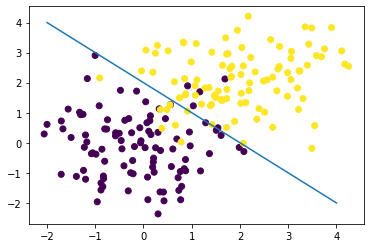

In [ ]:
fig, ax = plt.subplots()
ax.scatter(train_data[:, 0], train_data[:, 1], c=train_labels)
ax.plot(range(-2, 5), range(4, -3, -1))
plt.show()

Na tak utworzonym zbiorze wytrenujemy model regresji logistycznej

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_data, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Funkcja ta zwraca meshgrid (czyli listę indeksów punktów z zadanego przedziału) na podstawie wygenerowanego zbioru danych.

In [ ]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


Dokonujemy predykcji oraz wyświetlamy wszystkie punkty pcolormeshem, żeby zobaczyć w jaki sposób regresja logistyczna dokonała podziału przestrzeni.

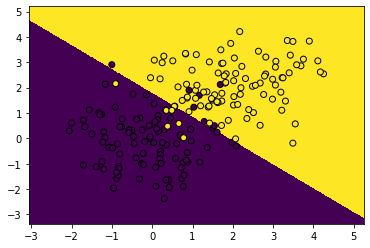

In [ ]:
xs, ys = get_grid(train_data)

predicted = model.predict(
    np.column_stack((xs.flatten(),
                     ys.flatten()))).reshape(xs.shape)

fig, ax = plt.subplots()
ax.pcolormesh(xs, ys, predicted)
ax.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, edgecolors='k')
plt.show()

Zwróćmy uwagę na fakt, że jest tutaj linia prosta.

Przejdźmy teraz do wykorzystania trochę bardziej rzeczywistych danych - binarnych, gdyż takie problemy rozwiązuje regresja logistyczna.

In [ ]:
import pandas as pd

def load_dataset(filename, class_column, index_col=None):
    dataset = pd.read_csv(f'ML-datasets/{filename}.csv', index_col=index_col)
    dataset['class'] = dataset[class_column].astype('category').cat.codes
    classes = dataset.pop(class_column).unique()
    return dataset, classes

def prepare_dataset(dataset_name):
    params = {'iris': {'class_column': 'species', 'index_col': None},
              'wine': {'class_column': 'Class', 'index_col': None},
              'glass': {'class_column': 'Type', 'index_col': 'ID'},
              'diabetes': {'class_column': 'Class', 'index_col': None}}
    dataset, classes = load_dataset(dataset_name,
                                    **params[dataset_name])
    y = dataset.pop('class')
    X = dataset
    return X, y, classes

In [ ]:
X, y, classes = prepare_dataset('diabetes')

In [ ]:
y.value_counts()

0    500
1    268
Name: class, dtype: int64

Dzielimy dataset na zbiory treningowy i testowy

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

K

Trenujemy model na danych treningowych

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
print(y_pred)
print(y_test.values)

[1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0
 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0
 1 0 0 0 0 1 0]
[0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0
 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0
 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0
 0 0 0 0 0 0 0]


Jak widać ten sposób pokazywania wyników nie pozwala zbyt dobrze ocenić działania modelu, dlatego też wykorzystamy metryki klasyfikacji - zarówno dla zbioru treningowego, jak i testowego.

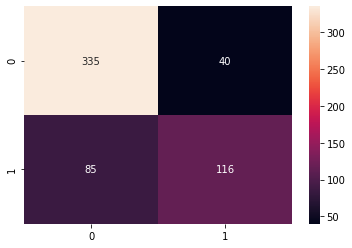

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

cm_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train, annot=True, fmt='d')
plt.show()

In [ ]:
cm_train

array([[335,  40],
       [ 85, 116]])

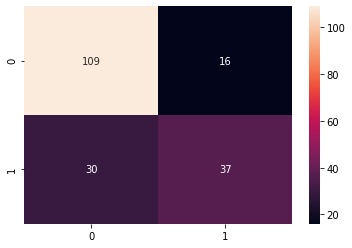

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
cm

array([[109,  16],
       [ 30,  37]])

Możemy też obliczyć wartości pozostałych metryk klasyfikacji korzystając z wbudowanych funkcji.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1-Score: {f1_train}')

Accuracy: 0.7829861111111112
Precision: 0.7435897435897436
Recall: 0.5771144278606966
F1-Score: 0.6498599439775911


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy_test}')
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1-Score: {f1_test}')

Accuracy: 0.7604166666666666
Precision: 0.6981132075471698
Recall: 0.5522388059701493
F1-Score: 0.6166666666666666


In [ ]:
print(f1_score(y_test, y_pred, average="micro"))
print(f1_score(y_test, y_pred, average="macro"))
print(f1_score(y_test, y_pred, average="weighted"))
print(f1_score(y_test, y_pred, average="binary", pos_label=0))

0.7604166666666666
0.7212121212121212
0.7527935606060607
0.8257575757575759


Zgodnie z oczekiwaniami, wartości dla zbioru treningowego są nieco wyższe. Możemy jeszcze spróbować wyświetlić to w formie wykresu.

In [ ]:
df_dict = {'train': [accuracy_train, precision_train, recall_train, f1_train],
           'test': [accuracy_test, precision_test, recall_test, f1_test]}
df = pd.DataFrame.from_dict(df_dict, orient='index',
                            columns=['accuracy', 'precision', 'recall', 'f1'])
melted = pd.melt(df.reset_index(), id_vars='index', var_name='metric')
melted

,index,metric,value
0,train,accuracy,0.782986
1,test,accuracy,0.760417
2,train,precision,0.743590
3,test,precision,0.698113
4,train,recall,0.577114
5,test,recall,0.552239
6,train,f1,0.649860
7,test,f1,0.616667


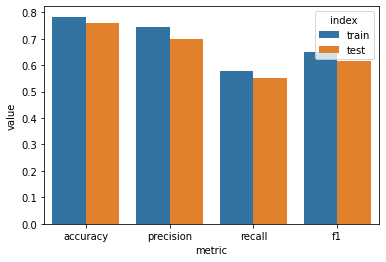

In [ ]:
sns.barplot(x='metric', y='value', hue='index', data=melted)

Możemy też regresję logistyczną zastosować dla zbiorów o wielu etykietach. Stosujemy wówczas strategię One versus Rest (trenujemy tyle klasyfikatorów, ile mamy klas) - sklearn robi to automatycznie.

In [ ]:
X, y, classes = prepare_dataset('iris')
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [ ]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.value_counts()

2    50
1    50
0    50
Name: class, dtype: int64

In [ ]:
y_train.value_counts()

0    38
2    37
1    37
Name: class, dtype: int64

In [ ]:
y_test.value_counts()

2    13
1    13
0    12
Name: class, dtype: int64

In [ ]:
classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
print(y_pred)
print(y_test.to_numpy())

[0 0 2 2 2 1 2 1 2 2 2 1 0 1 2 1 2 0 1 2 1 2 0 2 0 0 1 2 0 2 0 1 0 0 2 1 2
 0]
[0 0 2 2 2 1 2 1 2 2 2 1 0 1 2 1 2 0 1 2 1 2 0 1 0 0 1 1 0 2 0 1 0 0 2 1 1
 0]


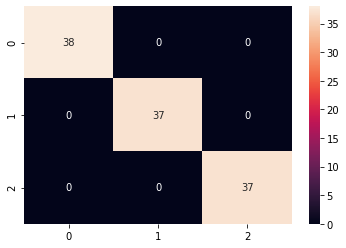

In [ ]:
cm_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train, annot=True, fmt='d')

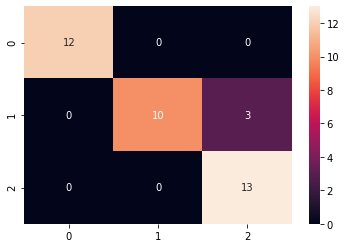

In [ ]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='weighted')
recall_train = recall_score(y_train, y_pred_train, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1-Score: {f1_train}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, average='micro')
recall_test = recall_score(y_test, y_pred, average='micro')
f1_test = f1_score(y_test, y_pred, average='micro')

print(f'Accuracy: {accuracy_test}')
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1-Score: {f1_test}')

Accuracy: 0.9210526315789473
Precision: 0.9210526315789473
Recall: 0.9210526315789473
F1-Score: 0.9210526315789473


In [ ]:
df_dict = {'train': [accuracy_train, precision_train, recall_train, f1_train],
           'test': [accuracy_test, precision_test, recall_test, f1_test]}
df = pd.DataFrame.from_dict(df_dict, orient='index',
                            columns=['accuracy', 'precision', 'recall', 'f1'])
melted = pd.melt(df.reset_index(), id_vars='index', var_name='metric')
melted

,index,metric,value
0,train,accuracy,1.000000
1,test,accuracy,0.921053
2,train,precision,1.000000
3,test,precision,0.921053
4,train,recall,1.000000
5,test,recall,0.921053
6,train,f1,1.000000
7,test,f1,0.921053


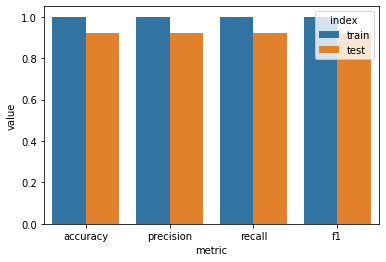

In [ ]:
sns.barplot(x='metric', y='value', hue='index', data=melted)